In [1]:
import pandas as pd
df = pd.DataFrame({'コク': [4,2,5,5,5,3,3,3,2,2,1],
                              'キレ': [5,4,4,3,4,4,4,3,4,3,3],
                              '香り': [2,1,3,4,5,3,2,2,3,2,2]},
                  index=['スーパードライ', '金麦','一番搾り', 'ヱビス', 'プレミアムモルツ', '淡麗', 
                            'のどごし', '麦とホップ', 'クリアアサヒ','ハイネケン','バドワイザー'])


In [5]:
df.corr()

,キレ,コク,香り
キレ,1.000000,0.280900,-0.012551
コク,0.280900,1.000000,0.683464
香り,-0.012551,0.683464,1.000000


In [3]:
import numpy  as np

#固有値、固有ベクトルを求める
W,v=np.linalg.eig(df.corr())


In [4]:
pd.DataFrame(W)

,0
0,0.256584
1,1.008825
2,1.734592


In [ ]:
pd.DataFrame(v)

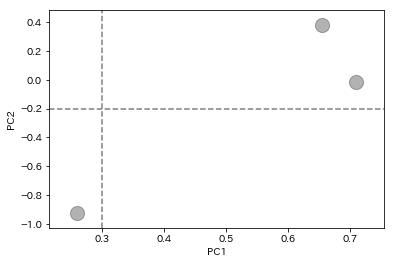

In [6]:
import matplotlib.pyplot as plt
plt.scatter(v[:, 2], v[:, 1], c='black', s=200, alpha=0.3)
plt.axvline(0.3,color="gray",linestyle="--")
plt.axhline(-0.2,color="gray",linestyle="--")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()


In [ ]:
v[:, 2]

In [ ]:
pd.DataFrame(v)

In [8]:
from sklearn.decomposition import PCA
#２つの成分で分析
pca = PCA(n_components=2)
pca.fit(df)
x=pca.fit_transform(df)

#主成分の寄与率をもとめる
pca.explained_variance_ratio_

#各主成分をもとめる
pca.components_


array([[ 0.08603689,  0.81094108,  0.57876785],
       [ 0.61229876,  0.41522475, -0.67281396]])

In [9]:
pd.DataFrame(x,index=df.index,columns=['第１主成分','第２主成分'])

,第１主成分,第２主成分
スーパードライ,0.404692,1.547173
金麦,-1.881995,0.777239
一番搾り,1.708364,0.677285
ヱビス,2.201095,-0.607828
プレミアムモルツ,2.865900,-0.668343
淡麗,0.086482,-0.153164
のどごし,-0.492286,0.519650
麦とホップ,-0.578323,-0.092649
クリアアサヒ,-0.724459,-0.568389
ハイネケン,-1.389264,-0.507874


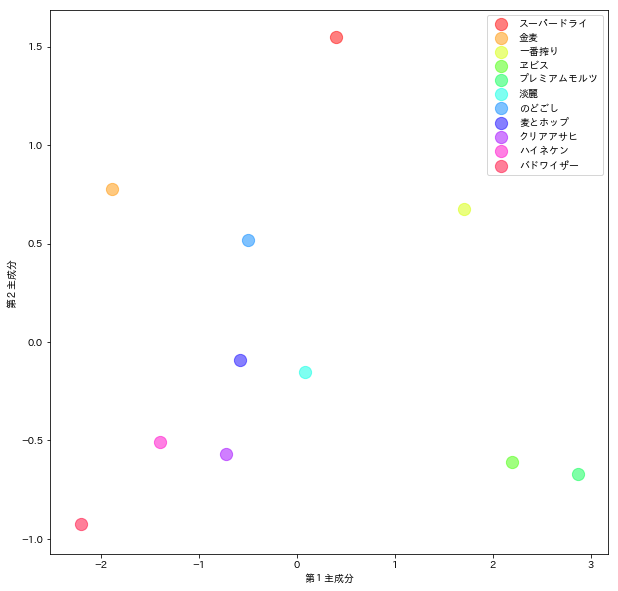

In [10]:
import matplotlib.cm as cm

#画像サイズを決める
plt.figure(figsize=(10,10))
   
#点ごとに色を変える
colors = [plt.cm.hsv(25*i,1) for i in range(len(df.index))]

for i in range(len(df.index)) :
    plt.scatter(x[i,0],x[i,1],c=colors[i],label=df.index[i],s=150, alpha=0.5)

plt.xlabel("第１主成分")
plt.ylabel("第２主成分")

plt.legend()

plt.show()



In [ ]:
import pandas as pd
gakuryoku = pd.read_csv("https://raw.githubusercontent.com/futurebridge/ZukaiML/master/gakuryoku.csv",encoding="SHIFT-JIS")


In [ ]:
gakuryoku

In [ ]:
gakuryoku.corr()

In [ ]:
import numpy  as np

#テストデータの固有値、固有ベクトルを求める
gW,gv=np.linalg.eig(gakuryoku.corr())


In [ ]:
pd.DataFrame(gW)

In [ ]:
#package FactorAnalyzerを利用
#Anaconda prompt でpip install FactorAnalyzer 
from factor_analyzer import FactorAnalyzer 

fa = FactorAnalyzer(n_factors=2,rotation='promax')
fa.fit(gakuryoku)


In [ ]:
pd.DataFrame(fa.get_uniquenesses(),index=gakuryoku.columns,columns=["独自因子"])

In [ ]:
pd.DataFrame(fa.loadings_,index=gakuryoku.columns,columns=["因子負荷量１：文系","因子負荷量２：理系"])

In [ ]:

#回転なし
fa = FactorAnalyzer(n_factors=2,rotation=None)
fa.fit(gakuryoku)

#直行回転
fav = FactorAnalyzer(n_factors=2,rotation='varimax')
fav.fit(gakuryoku)

#斜交回転
fap = FactorAnalyzer(n_factors=2,rotation='promax')
fap.fit(gakuryoku)







In [ ]:
pd.DataFrame(fa.loadings_,index=gakuryoku.columns,columns=["回転なし：文系","回転なし：理系"])

In [ ]:
pd.DataFrame(fa.get_uniquenesses(),index=gakuryoku.columns,columns=["回転なし独自因子"])

In [ ]:
pd.DataFrame(fap.loadings_,index=gakuryoku.columns,columns=["直交回転：文系","直交回転：理系"])

In [ ]:
pd.DataFrame(fav.loadings_,index=gakuryoku.columns,columns=["斜交回転：文系","斜交回転：理系"])